# Source and Sink in Freestream 

In [1]:
import numpy
import math
from matplotlib import pyplot

In [2]:
%matplotlib inline

In [3]:
N = 200
x_start, x_end = -4.0, 4.0
y_start, y_end = -2.0, 2.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [4]:
numpy.shape(X)

(200, 200)

## Stream Flow

In [5]:
u_inf = 1.0

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones((N, N), dtype = float)
v_freestream = numpy.zeros((N, N), dtype = float)

# compute the stream-function
psi_freestream = u_inf * Y

In [6]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink 
    xs: float
        x-coordinate of the source (or sink)
    ys: float
        y-coordinate of the source (or sink)
    X: 2D Numpy array of the floats 
        x-coordinates of the mesh points
    Y: 2D Numpy Array of Floats
        y-coordinates of the mesh points
        
    Returns
    -------
    u: 2D Numpy array of float
        x-component of the velocity vector field
    v: 2D Numpy array of floats 
        y-component of the velocity vector field
    """
    
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [7]:
help(get_velocity)

Help on function get_velocity in module __main__:

get_velocity(strength, xs, ys, X, Y)
    Returns the velocity field generated by a source/sink
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink 
    xs: float
        x-coordinate of the source (or sink)
    ys: float
        y-coordinate of the source (or sink)
    X: 2D Numpy array of the floats 
        x-coordinates of the mesh points
    Y: 2D Numpy Array of Floats
        y-coordinates of the mesh points
        
    Returns
    -------
    u: 2D Numpy array of float
        x-component of the velocity vector field
    v: 2D Numpy array of floats 
        y-component of the velocity vector field



In [8]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [9]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)
psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

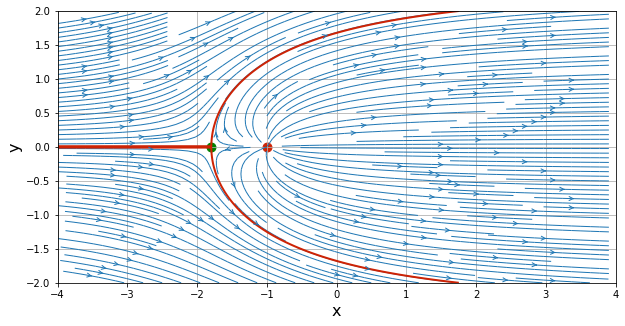

In [10]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

width = 10 
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
pyplot.scatter(x_source, y_source, color = '#CD2305', s = 80, marker = 'o')

x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

pyplot.scatter(x_stagnation, y_stagnation, color = 'g', s = 80, marker = 'o')

pyplot.contour(X, Y, psi, 
               levels = [-strength_source / 2, strength_source / 2],
               colors = '#CD2305', linewidths = 2, linestyles = 'solid');

## Source-Sink Pair in Uniform Flor

In [11]:
strength_sink = -5.0
x_sink, y_sink = 1.0, 0.0

u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

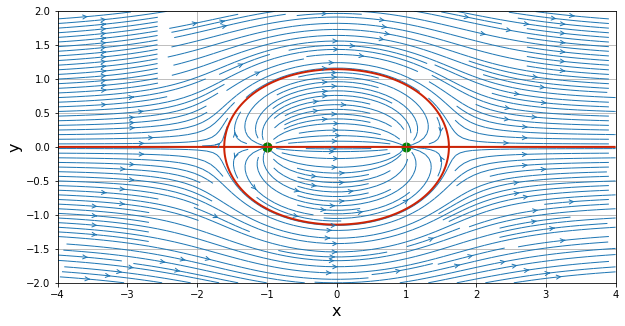

In [12]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source  + v_sink
psi = psi_freestream + psi_source + psi_sink

width = 10 
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density = 2, linewidth = 1, arrowsize = 1, arrowstyle = '->')
pyplot.scatter(x_source, y_source, color = '#CD2305', s = 80, marker = 'o')

pyplot.scatter([x_source, x_sink], [y_source, y_sink], color = 'g', s = 80, marker = 'o')

pyplot.contour(X, Y, psi, 
               levels = [0.], colors = '#CD2305', linewidths = 2, linestyles = 'solid');

## Bernoulli's Equation and the Pressure Coefficient

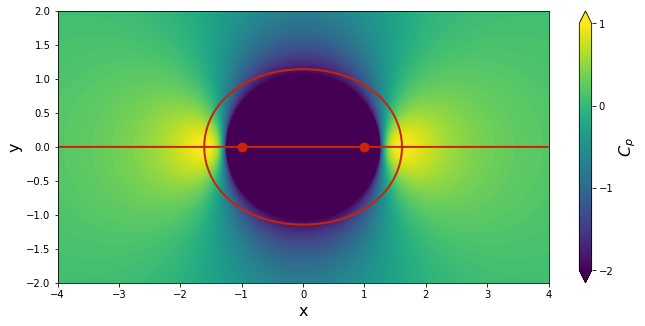

In [13]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter([x_source, x_sink], [y_source, y_sink],
               color='#CD2305', s=80, marker='o')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');